<a href="https://colab.research.google.com/github/Marcll0/R/blob/main/MCMC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**MCMC**

Objetivo do MCMC: produzir amostras de uma distribuição de probabilidades P(x)
, onde x pode ser um vetor.

Exemplo: MCMC em uma dimensão: amostragem de uma gaussiana de média 2 e desvio padrão 2 (equivalente a rnorm(mu=2,sd=2))

Em geral, quando se trata de probabilidades, é melhor trabalhar com logP(x)
 do que com P(x)
 diretamente. Vamos considerar primeiro o caso direto e depois o uso do logaritmo.

Vamos gerar amostras por MCMC para a distribuição de probabilidades P(x)=N(μ=2,σ=2)
:

O primeiro passo é definir P(x)
:

In [7]:
p = function(x){dnorm(x, mean = 2, sd = 2, log = FALSE)}

### Em seguida, a função proposta: vamos supor que as propostas sejam também geradas por uma gaussiana, mas de média x e desvio padrão 1:

funcao_proposta = function(x){rnorm(1,mean = x, sd= 1)}

parâmetros do algoritmo de Metropolis:


1.   valor inicial para x : xini

2.   número de iterações desejadas: niter

In [8]:
# função que vai gerar a cadeia via MCMC com o algoritmo de Metropolis-Hastings

mcmc = function(xini, niter){
# defino o vetor que conterá os valores da cadeia
    cadeia = array(niter+1)
# inicialização da cadeia
    cadeia[1] = xini
# loop para gerar a cadeia
    for (i in 1:niter){
# obtenho uma proposta
        proposta = funcao_proposta(cadeia[i])
# razão entre o valor proposto nesta iteração e o valor anterior da cadeia
        probab = p(proposta)/p(cadeia[i])
# gero um número aleatório uniformemente distribuído entre 0 e 1
      runif1=runif(1)
# testo se a proposta é aceita ou não
        if (probab > runif1) {
# aceita
            cadeia[i+1] = proposta}
        else{
# não aceita: usa o valor anterior da cadeia
            cadeia[i+1] = cadeia[i]}
    }
# retorna a cadeia
    return(cadeia)
}

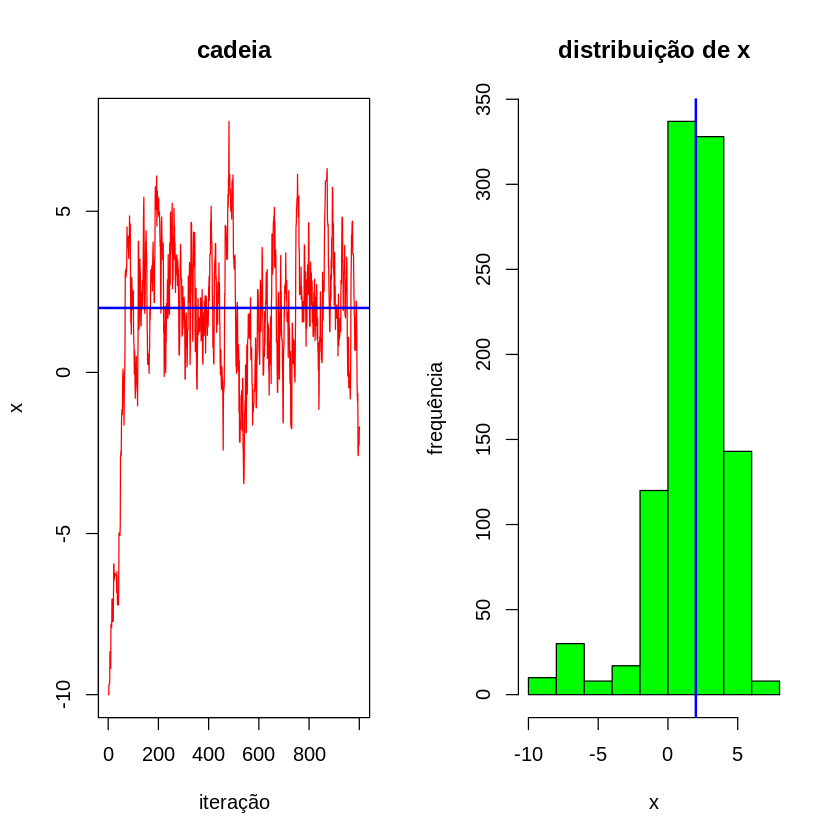

In [9]:
#inicialização
set.seed(1234)

# vamos começar "longe" do valor médio esperado
xini=-10
niter=1000

#mcmc
y = mcmc(xini,niter)

#visualização da cadeia:
par(mfrow = c(1,2))
x=seq(1,niter+1,1)
plot(x,y,type='l',col='red',ylab='x',xlab='iteração',main='cadeia')

# adiciona uma reta horizontal no valor esperado
abline(h = 2, col="blue",lwd=2)

hist(y,col='green',main='distribuição de x',xlab='x',ylab='frequência')

# adiciona uma reta vertical no valor esperado
abline(v = 2, col="blue",lwd=2)

**log de P(x)**

Muitas vezes é conveniente se trabalhar com o logaritmo da distribuição de probabilidades. Vamos então considerar MCMC com o log de P(x)

Notem a diferença na definição da função:

In [12]:
p = function(x){return(dnorm(x, mean = 2, sd = 2, log = TRUE))}

In [13]:

mcmc1 = function(xini, niter){
    cadeia = array(niter+1)
    cadeia[1] = xini
    for (i in 1:niter){
        proposta = funcao_proposta(cadeia[i])
# como estou usando o log(p):
        probab = exp(p(proposta) - p(cadeia[i]))
      runif1=runif(1)
        if (probab > runif1) {
            cadeia[i+1] = proposta}
        else{
            cadeia[i+1] = cadeia[i]}
    }
    return(cadeia)
}

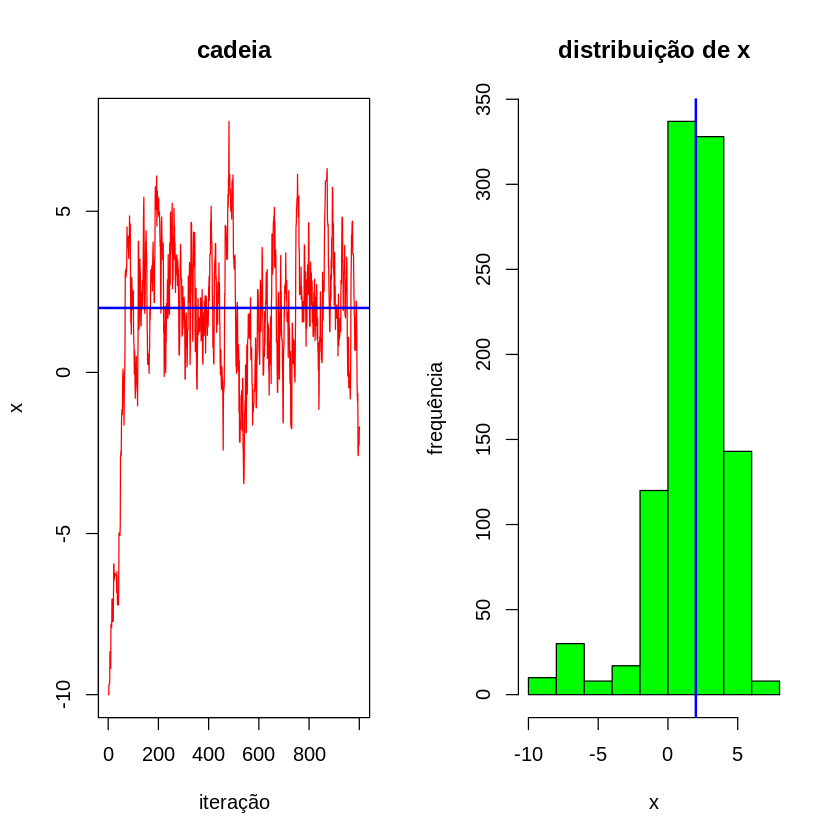

In [14]:
#inicialização
set.seed(1234)
xini=-10
niter=1000

#mcmc
y = mcmc1(xini,niter)

#visualização da cadeia:
par(mfrow = c(1,2))
x=seq(1,niter+1,1)
plot(x,y,type='l',col='red',ylab='x',xlab='iteração',main='cadeia')
abline(h = 2, col="blue",lwd=2)
hist(y,col='green',main='distribuição de x',xlab='x',ylab='frequência')
abline(v = 2, col="blue",lwd=2)

**Burn-in**

Um certo número de cadeias iniciais (denominadas burn-in) devem ser removidas da análise por não terem ainda atingido uma "região de convergência". Por exemplo, a figura abaixo mostra as 200 iterações iniciais de 4 cadeias com condições iniciais diferentes:

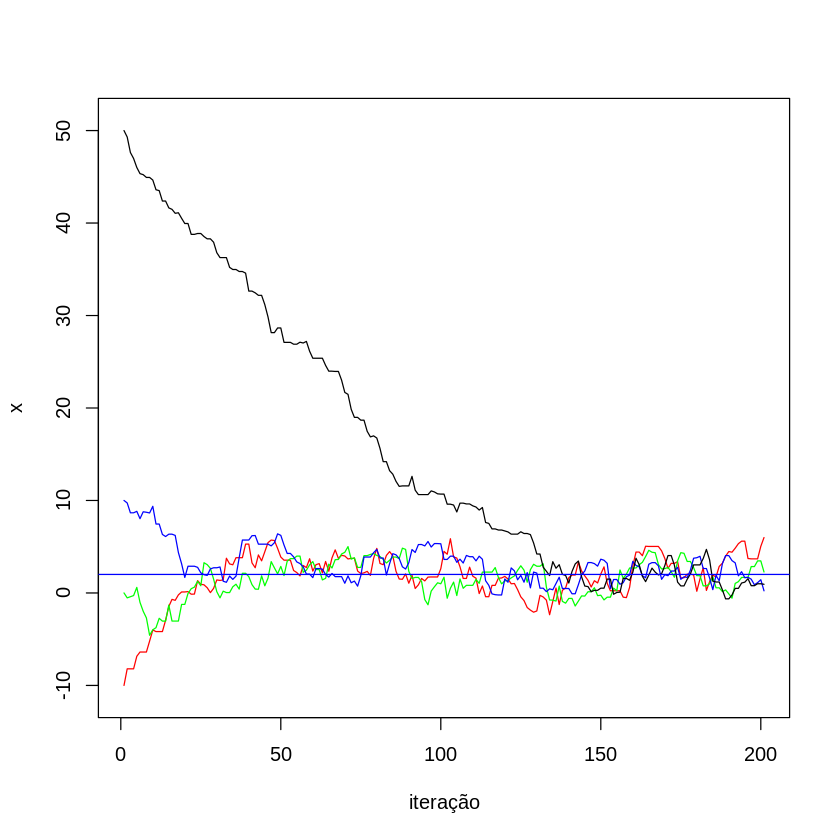

In [15]:
#inicialização
ncadeia=4
niter=200
xinic=c(-10,0,10,50)

#inicialização de variáveis
y=rep(0,niter+1)
Y=matrix(nrow=niter+1,ncol=ncadeia)

#mcmc
for (i in 1:ncadeia){
y=mcmc1(xinic[i],niter)

# combina  as colunas do vetor y (cadeias)
Y[,i]=cbind(y)
}

#visualização da cadeia:
par(mfrow = c(1,1))
x=seq(1,niter+1,1)
plot(x,Y[,1],type='l',col='red',ylab='x',xlab='iteração',ylim=c(-11,51))
lines(x,Y[,2],type='l',col='green',ylab='x',xlab='iteração')
lines(x,Y[,3],type='l',col='blue',ylab='x',xlab='iteração')
lines(x,Y[,4],type='l',col='black',ylab='x',xlab='iteração')
abline(h = 2, col="blue" )

## Nesse exemplo, vemos que as primeiras ~150 iterações devem ser descartadas como burn-in.

**Análise**

Vamos supor que fizemos uma ou mais simulações e a cadeia convergiu.

Como podemos exibir os resultados? A primeira coisa a se fazer é definir quanto vamos eliminar da cadeia como burn-in. Com o resto da cadeia podemos:

determinar a distribuição de x
saber a taxa de aceitação do algoritmo, isto é, a fração de propostas que foram aceitas
calcular estatísticas de interesse: média, mediana, variância, quartis...

Simulação:

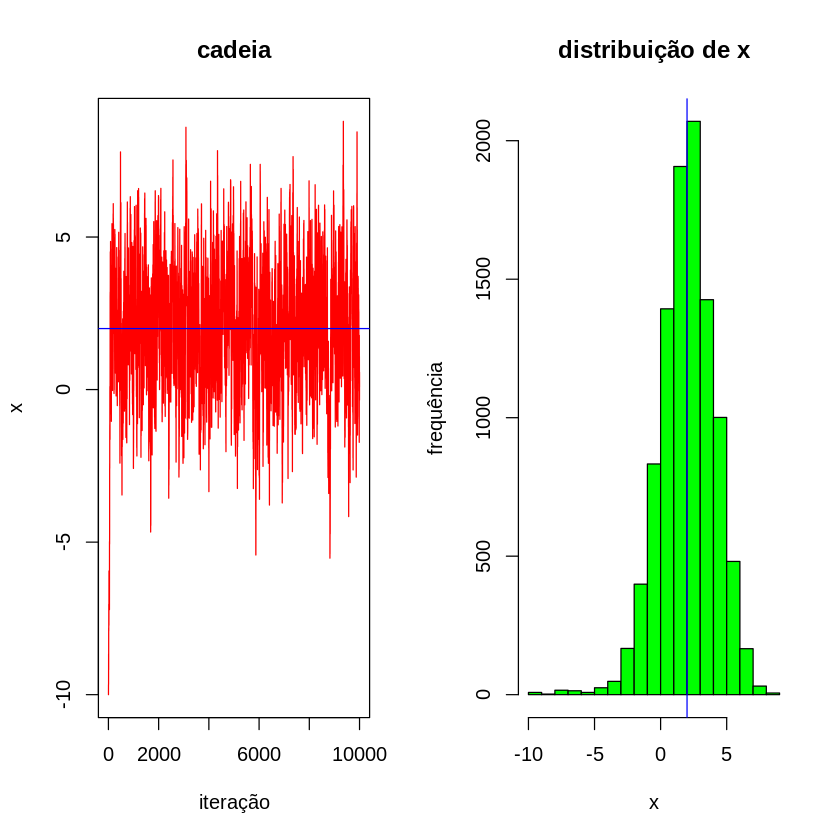

In [16]:
#inicialização
set.seed(1234)
xini=-10
niter=10000

#mcmc
y = mcmc1(xini,niter)

#visualização da cadeia:
par(mfrow = c(1,2))
x=seq(1,niter+1,1)
plot(x,y,type='l',col='red',ylab='x',xlab='iteração',main='cadeia')
abline(h = 2, col="blue" )
hist(y,col='green',main='distribuição de x',xlab='x',ylab='frequência')
abline(v = 2, col="blue" )

In [17]:
burnin = 1000

#taxa de aceitacao: fração dos valores propostos que são aceitos
aceitacao = 1-mean(duplicated(y[-(1:burnin)]))
aceitacao

[1] 0.8403511

In [18]:
#media, mediana, desvio padrão
mean(y[-(1:burnin)])

[1] 2.062565

In [19]:
median(y[-(1:burnin)])

[1] 2.094431

In [20]:
sd(y[-(1:burnin)])

[1] 2.002334

In [22]:
#intervalo de confiança de 95%
quantile(y[-(1:burnin)], probs = c(0.025,0.975))

2.5%     97.5% 
-1.983647  5.904849

**Convergência**

Vamos agora analisar a convergência da cadeia. Para isso vamos jogar fora as iterações de burn-in; em seguida dividimos a cadeia restante em 4 segmentos, calculamos a média e a dispersão dos 4 segmentos e avaliamos.

In [23]:
seg=(niter-burnin)/4
media.seg = c(0,0,0,0)
sd.seg = c(0,0,0,0)
for (i in 1:4){
i1=burnin+1+(i-1)*seg
i2=i1+seg
media.seg[i] = mean(y[i1:i2])
sd.seg[i] = sd(y[i1:i2])
}
#media de cada segmento da cadeia:
media.seg

[1] 2.109344 2.153425 1.883418 2.105790

In [24]:
#desvio padrão de cada segmento da cadeia
sd.seg

[1] 1.970430 1.881251 2.054113 2.087099

In [25]:
#media das cadeias
mean(media.seg)

[1] 2.062994

In [26]:
#desvio padrão das cadeias
sd(media.seg)

[1] 0.1216623

Um outro procedimento muito comum (principalmente em problemas complexos) é rodar várias cadeias e compará-las, para avaliar a convergência.

Exemplo: vamos comparar resultados de 4 cadeias

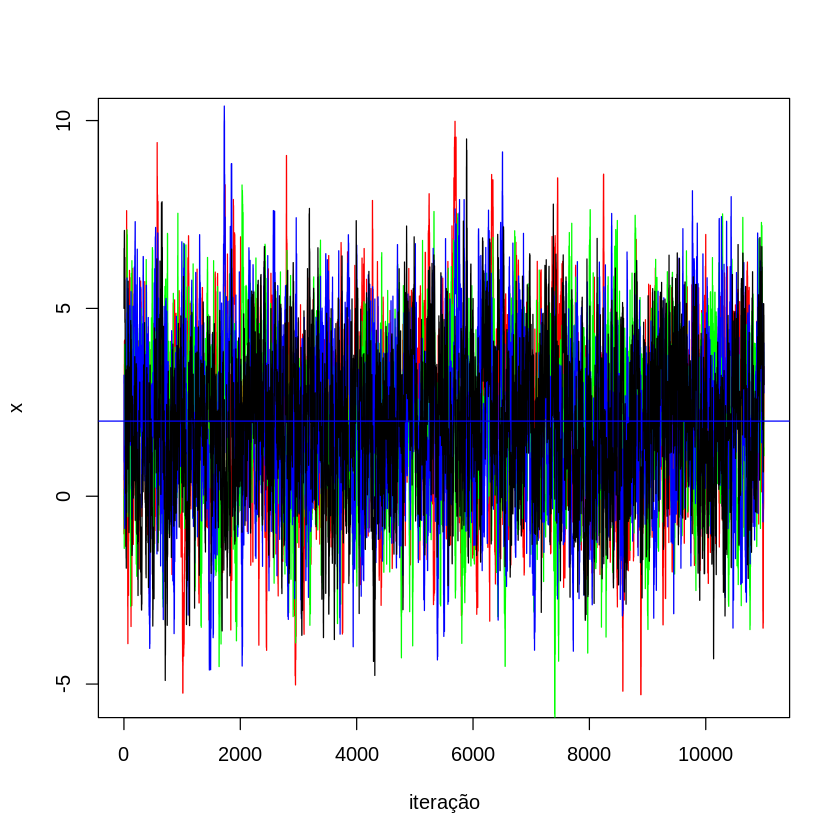

In [27]:
#inicialização
ncadeia=4
niter=11000
xinic=c(-1,0,3,5)
#inicialização de variáveis
y=rep(0,niter+1)
Y=matrix(nrow=niter+1,ncol=ncadeia)
#mcmc
for (i in 1:ncadeia){
y=mcmc1(xinic[i],niter)
Y[,i]=cbind(y)}
#visualização da cadeia:
par(mfrow = c(1,1))
x=seq(1,niter+1,1)
plot(x,Y[,1],type='l',col='red',ylab='x',xlab='iteração')
lines(x,Y[,2],type='l',col='green',ylab='x',xlab='iteração')
lines(x,Y[,3],type='l',col='blue',ylab='x',xlab='iteração')
lines(x,Y[,4],type='l',col='black',ylab='x',xlab='iteração')
abline(h = 2, col="blue" )

Podemos, também, calcular algumas estatísticas para essas cadeias (assumindo aqui o mesmo burn-in de antes para todas):

In [28]:
# media de cada cadeia:
media=rep(0,ncadeia)
for (i in 1:ncadeia){media[i]=mean(Y[-(1:burnin),i])}
media

[1] 1.938203 1.940195 1.981517 2.003466

In [29]:
# desvio padrão de cada cadeia:
dp=rep(0,ncadeia)
for (i in 1:ncadeia){dp[i]=sd(Y[-(1:burnin),i])}
dp

[1] 2.089776 2.056148 2.138996 1.971478

e, se quisermos, podemos combinar as diferentes cadeias numa "super-cadeia":

In [30]:
# super cadeia: combinação de todas as cadeias sem o burn-in
Ysuper=c(Y[-(1:burnin),1],Y[-(1:burnin),2],Y[-(1:burnin),3],Y[-(1:burnin),4])
# super media e desvio padrão
mean(Ysuper)

[1] 1.965845

In [31]:
sd(Ysuper)

[1] 2.065111

Fonte: http://www.astro.iag.usp.br/~laerte/aga0505_22/R4.html